<a href="https://colab.research.google.com/github/melisamichuki01/WIDInsuarance/blob/main/Final_Team15_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoInland Vehicle Insurance Claim Challenge Team 15 Notebook
**WiD Datathon: Team 15 Members**
1. Fridah Musee
2. Melisa Michuki
3. Melanie Fayne
4. Ryan Mburu

### Importing libraries

---

In [ ]:
# Installing pandas profling to be used for EDA
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/ydataai/pandas-profiling/archive/master.zip


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

# Loading Plotting libraries
plt.style.use("ggplot")
init_notebook_mode(connected=True)
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix
from tqdm.notebook import tqdm_notebook
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Import Necessary Packages

import pandas_profiling as pp
import IPython

NameError: ignored

### Reading Files

---

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the combined csv (train.csv and test.csv) 
# We combined the csv files first for easy pre-processing
data = pd.read_csv("/content/drive/MyDrive/WiD Datathon - Team 15/data/Combined.csv")
sample_sub = pd.read_csv('/content/drive/MyDrive/WiD Datathon - Team 15/data/SampleSubmission.csv')

print(f'The shape of the dataset is: {data.shape}')
# Preview the first five rows of the combined dataset
data.head()

The shape of the dataset is: (13281, 14)


,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.0
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.0


In [ ]:
# Preview the first five rows of the sample submission file
sample_sub.head()

,ID,target
0,ID_01QM0NU,0
1,ID_024NJLZ,0
2,ID_02NOVWQ,0
3,ID_02VSP68,0
4,ID_02YB37K,0


### Some basic EDA

---

In [ ]:
# Creating a summary eda report using pandas profiling
profile = pp.ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

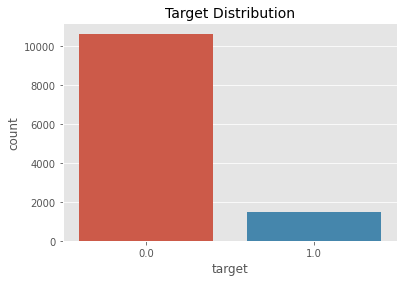

In [ ]:
# Checking Distribution of Target Variable
sns.countplot(data.target)
plt.title('Target Distribution', fontdict={'size':14});

In [ ]:
# Checking the number of unique values per categorical column
date_cols = [col for col in data.columns if 'Date' in col]
num_cols = ['Age', 'No_Pol']
cat_cols = [col for col in data.columns if col not in date_cols+num_cols+['ID', 'target']]
for col in cat_cols:
  print(col)
  print(data[col].unique(), '\n')

Gender
['Male' 'Female' 'Entity' 'Joint Gender' nan 'NO GENDER' 'NOT STATED'
 'SEX'] 

Car_Category
['Saloon' 'JEEP' nan 'Motorcycle' 'Truck' 'Bus' 'Mini Bus' 'Pick Up'
 'Mini Van' 'Van' 'Pick Up > 3 Tons' 'CAMRY CAR HIRE' 'Wagon'
 'Shape Of Vehicle Chasis' 'Sedan' 'Station 4 Wheel' 'Tipper Truck'] 

Subject_Car_Colour
['Black' 'Grey' 'Red' nan 'As Attached' 'Blue' 'Silver' 'Green' 'Ash'
 'White' 'Gray & Gray' 'Wine' 'Brown' 'Red & Blue' 'Gold' 'Gray & Silver'
 'Orange' 'Red & Black' 'Dark Grey' 'White & Red' 'Light Green'
 'Dark Gray' 'B.Silver' 'Purple' 'Blue & Red' 'Red & Yellow' 'Yellow'
 'Red & White' 'D. Red' 'Dark Red' 'Black & White' 'White & Blue' 'Cream'
 'Dark Green' 'D. Gold' 'Champagne' 'Light Blue' 'Blue&White&Red'
 'White & Yellow' 'Dark Blue' 'Black & Orange' 'Burgundy' 'Yellow & White'
 'Beige Mitalic' 'Light Gray' 'Blue Sky' 'Red Maroon'] 

Subject_Car_Make
['TOYOTA' nan 'REXTON' 'Lexus' 'Hyundai' 'Iveco' 'DAF' 'Honda' 'Mercedes'
 'Jincheng' 'ACURA' 'Ford' 'Volkswagen

### Data Cleaning and Preprocessing

---

#### Cleaning datatypes

In [ ]:
# Check the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      13281 non-null  object 
 1   Policy Start Date       13281 non-null  object 
 2   Policy End Date         13281 non-null  object 
 3   Gender                  12881 non-null  object 
 4   Age                     13281 non-null  int64  
 5   First Transaction Date  13281 non-null  object 
 6   No_Pol                  13281 non-null  int64  
 7   Car_Category            9171 non-null   object 
 8   Subject_Car_Colour      5622 non-null   object 
 9   Subject_Car_Make        10557 non-null  object 
 10  LGA_Name                6149 non-null   object 
 11  State                   6137 non-null   object 
 12  ProductName             13281 non-null  object 
 13  target                  12079 non-null  float64
dtypes: float64(1), int64(2), object(11)
me

In [ ]:
# Change each column to its appriopriate datatype
for col in data.columns:
  if col in date_cols:
    data[col] = pd.to_datetime(data[col])
  elif col in cat_cols:
    data[col] = data[col].astype('category')

# Confirm whether the changes have been applied successfully
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      13281 non-null  object        
 1   Policy Start Date       13281 non-null  datetime64[ns]
 2   Policy End Date         13281 non-null  datetime64[ns]
 3   Gender                  12881 non-null  category      
 4   Age                     13281 non-null  int64         
 5   First Transaction Date  13281 non-null  datetime64[ns]
 6   No_Pol                  13281 non-null  int64         
 7   Car_Category            9171 non-null   category      
 8   Subject_Car_Colour      5622 non-null   category      
 9   Subject_Car_Make        10557 non-null  category      
 10  LGA_Name                6149 non-null   category      
 11  State                   6137 non-null   category      
 12  ProductName             13281 non-null  catego

In [ ]:
data.shape

(13281, 14)

#### Cleaning the Gender Column

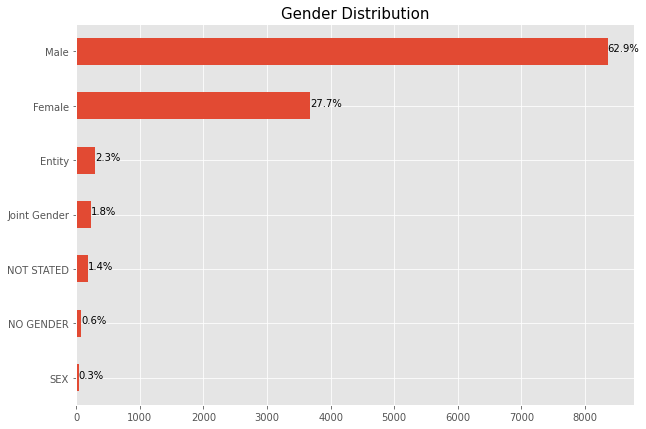

In [ ]:
# Gender distribution 
ax = data.Gender.value_counts().sort_values().plot(kind = 'barh', figsize=(10,7))
plt.title('Gender Distribution', fontdict={'size': 15})
for p in ax.patches:
  percentage ='{:,.1f}%'.format((p.get_width()/data.shape[0])*100)
  width, height =p.get_width(),p.get_height()
  x=p.get_x()+width+0.02
  y=p.get_y()+height/2
  ax.annotate(percentage,(x,y))

In [ ]:
# reducing the number of unique values
mapper = {'Entity':'Other', 'Joint Gender':'Other', 'NOT STATED':'Other', 'NO GENDER': 'Other', 'SEX':"Other"}
data.Gender = data.Gender.replace(mapper)

# Confirm mappings
data.Gender.value_counts()

Male      8356
Female    3679
Other      846
Name: Gender, dtype: int64

#### Cleaning the Age Column

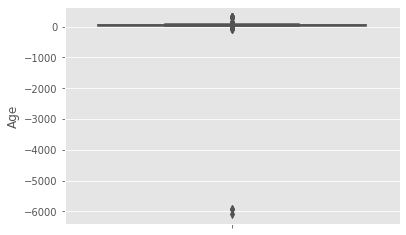

In [ ]:
# Plot the outliers on a boxplot (age)
sns.boxplot(data = data, y = 'Age')
plt.show()

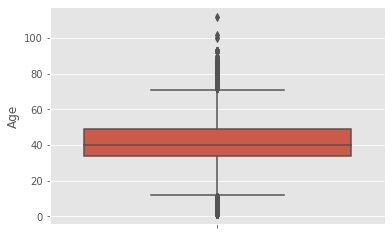

In [ ]:
# Dropping the absurd outliers first
data = data.loc[(data['Age'] > 0) & (data['Age'] < 120)]
sns.boxplot(data = data, y = 'Age')
plt.show()

In [ ]:
# Use IQR (InterQuantile Range method) to handle outliers
# Quantiles
q25 = data['Age'].quantile(0.25)
q75 = data['Age'].quantile(0.75)
# The lower quantile age is 37 years and the upper quantile age is 68 years old
# Calculating the IQR
IQR = q75 - q25
# Specifying the lower and upper limit
lower_limit = q25 - 1.5 * IQR
upper_limit = q75 + 1.5 * IQR
print(upper_limit)
print(lower_limit)

71.5
11.5


The IQR method states that the threshhold should be drivers over 11 years and under 71 years.

We thought as a team that there are older drivers out there, so we picked our own threshholds :

1. Drivers under 18 years (that's the legal age to drive in Nigeria )
2. Drivers over 80 years ( Older than that should NOT be on the road bro)

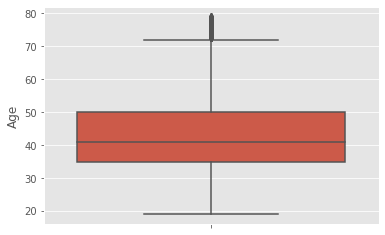

In [ ]:
# Handling outliers final
data = data.loc[(data['Age'] > 18) & (data['Age'] < 80)]
sns.boxplot(data = data, y = 'Age')
plt.show()

We'll give the benefit of the doubt to the few old outliers out there :)

#### Cleaning the State Column

In [ ]:
#Replacing the states with the corrected details given in NigerianStateNames.csv names to increase the accurancy of the model with correct info

data['State'] = data['State'].replace({'Abuja-Municipal':'Federal Capital Territory','Oshodi-Isolo':'Lagos','Ibeju-Lekki':'Lagos','Ibadan-West':'Ibadan','Eti-Osa':'Lagos'             ,'Obia-Akpor':'Awka-Ibom','Ibadan-East':'Oyo','Amuwo-Odofin':'Lagos','ENUGU-EAST':'Enugu','Esan-West':'Edo','Obafemi-Owode':'Ogun','Orile-Iganmu':'Lagos', 'Ifako-Ijaye':'Lagos', 'Ibadan-North':'Oyo',
'Jos-North':'Plateau','Ondo-West':'Ondo','Kaduna-North':'Kaduna','Aniocha-South':'Delta','Ile-Oluji':'Ondo','Nnewi-North':'Anambra'
,'Aboh-Mbaise':'Imo', 'Akoko-West':'Ondo','Warri-Central':'Edo', 'Jos-South':'Plateus','Onitsha-North':'Anambra','Ajeromi-Ifelodun':'Osun', 'Kano-Municipal':'Kano','Ife-Central':'Osun','Ilorin-West':'Kwara'
,'Lagelu-North':'Oyo', 'Owerri-Municipal':'Imo','Nsit-Ubium':'Awka-Ibom', 'Udi-Agwu':'Enugu','Owerri-West':'Imo','Ogbmosho-South':'Oyo', 'Umuahia-South':'Abia','Ajegunle-State':'Lagos','Ekiti-West':'Ekiti',
'Ogun-Waterside':'Ogun','Awka-North':'Anambra','ABULE-EGBA':'Lagos','Ife-North':'Osun', 'Anambra-East':'Anambra', 'Etsako-West':'Edo'
,'Aba-North':'Abia','Ibarapa-Central':'Oyo','Idemili-North':'Anambra', 'Ogba-Ndoni':'Rivers','Calabar-Municipality':'Cross-River','AJAO-ESTATE':'Lagos','Ekiti-East':'Ekiti','Ovia-SouthWest':'Edo','Essien-Udim':'Akwa-Ibom','Ado-Ota':'Ogun','Oyo-East':'Oyo', 'Ilorin-East':'Kwara','Ilesha-West':'Osun','Central-Abuja':'Federal Capital Territory','Owerri-North':'Imo','Ilesha-East':'Osun', 'Awka-South':'Delta','Enugu-North':'Enugu','Ibadan':'Oyo',
'Esan-Central':'Edo', 'Isoko-south':'Delta','Ethiope-East':'Delta','Ijebu-Ode':'Ogun','QuaAn-Pan':'Plateus', 'Warri-North':'Delta', 'Ado-Ekiti':'Ekiti','Ijebu-East':'Ogun','Onitsha-South':'Anambra', 'Ughelli-North':'Delta','Warri-South':'Delta', 'Kaduna-South':'Kaduna',
'Port-Harcourt':'Rivers','N-A':np.NaN, 'Idemili-south': 'Anambra', 'Ngor-Okpala':'Imo','Oyo-West':'Oyo', 'Aba-South':'Abia', 'Isoko-North':'Delta','Oshimili-North':'Delta','Ndokwa-East':'Delta', 'Nnewi-South':'Anambra', 'ENUGU-SOUTH':'Enugu','Ijebu-North':'Ogun',
'Asari-Toru':'Rivers','Akwa-Ibom':'Awka-Ibom'})


#### Filling missing values

In [ ]:
# Load in the data with no outliers
data.shape

(12151, 14)

In [ ]:
# Checking missing values
missing_values_per = data.isna().sum()*100/len(data)
missing_values_per

ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     1.448440
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              29.511974
Subject_Car_Colour        57.550819
Subject_Car_Make          20.706115
LGA_Name                  55.238252
State                     55.345239
ProductName                0.000000
target                     9.069212
dtype: float64

In [ ]:
# Filling missing values in the gender column with the value "Other"
data['Gender'].fillna('Other', inplace = True)
missing_values_per = data.isna().sum()*100/len(data)
missing_values_per

ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     0.000000
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category              29.511974
Subject_Car_Colour        57.550819
Subject_Car_Make          20.706115
LGA_Name                  55.238252
State                     55.345239
ProductName                0.000000
target                     9.069212
dtype: float64

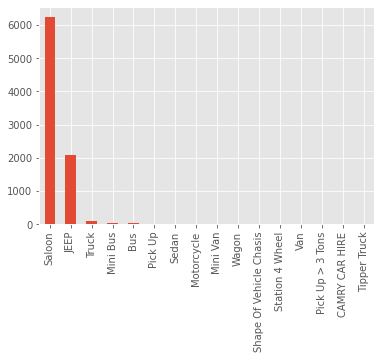

In [ ]:
data['Car_Category'].value_counts().plot(kind = "bar")
plt.show()

In [ ]:
# Filling missing values in the car category column with the mode value 'Saloon'
mode = data['Car_Category'].mode()[0]
print(mode)
data['Car_Category'].fillna(mode, inplace = True)
missing_values_per = data.isna().sum()*100/len(data)
missing_values_per

Saloon


ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     0.000000
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category               0.000000
Subject_Car_Colour        57.550819
Subject_Car_Make          20.706115
LGA_Name                  55.238252
State                     55.345239
ProductName                0.000000
target                     9.069212
dtype: float64

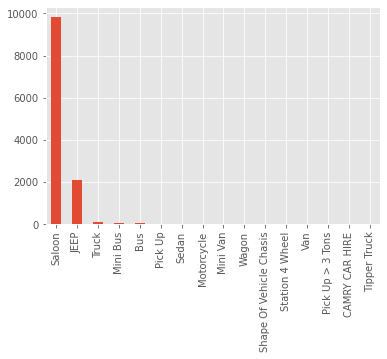

In [ ]:
data['Car_Category'].value_counts().plot(kind = "bar")
plt.show()

In [ ]:
# Filling missing values in the Subject_Car_Make column with the mode 
mode = data['Subject_Car_Make'].mode()[0]
print(mode)
data['Subject_Car_Make'].fillna(mode, inplace = True)
missing_values_per = data.isna().sum()*100/len(data)
missing_values_per

TOYOTA


ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     0.000000
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category               0.000000
Subject_Car_Colour        57.550819
Subject_Car_Make           0.000000
LGA_Name                  55.238252
State                     55.345239
ProductName                0.000000
target                     9.069212
dtype: float64

In [ ]:
print(data["LGA_Name"].value_counts(ascending=False))

Victoria Island    891
Ikeja              417
Surulere           293
Eti-Osa            237
Lagos Mainland     231
                  ... 
Oshimili North       0
EFFURUN              0
Oyi                  0
AKOKO-EDO            0
Iwo                  0
Name: LGA_Name, Length: 269, dtype: int64


In [ ]:
# Filling missing values in the LGA_Name column with the mode 
mode = data['LGA_Name'].mode()[0]
print(mode)
data['LGA_Name'].fillna(mode, inplace = True)
missing_values_per = data.isna().sum()*100/len(data)
missing_values_per

Victoria Island


ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     0.000000
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category               0.000000
Subject_Car_Colour        57.550819
Subject_Car_Make           0.000000
LGA_Name                   0.000000
State                     55.345239
ProductName                0.000000
target                     9.069212
dtype: float64

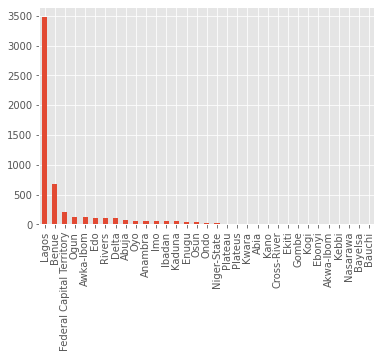

In [ ]:
data['State'].value_counts().plot(kind = "bar")
plt.show()

Since the State column is naturally biased towards the value Lagos, we opted to fill in the 55% missing values with the mode, which is the value Lagos

In [ ]:
# Filling missing values in the State column with the mode 
mode = data['State'].mode()[0]
print(mode)
data['State'].fillna(mode, inplace = True)
missing_values_per = data.isna().sum()*100/len(data)
missing_values_per

Lagos


ID                         0.000000
Policy Start Date          0.000000
Policy End Date            0.000000
Gender                     0.000000
Age                        0.000000
First Transaction Date     0.000000
No_Pol                     0.000000
Car_Category               0.000000
Subject_Car_Colour        57.550819
Subject_Car_Make           0.000000
LGA_Name                   0.000000
State                      0.000000
ProductName                0.000000
target                     9.069212
dtype: float64

#### Dropping unnecessary columns

In [ ]:
# Dropping the ID column since it is not used for model prediction
data = data.drop("ID", axis=1)

In [ ]:
# Dropping the First Transaction Date column since it is similar to the Policy Start Date
data = data.drop("First Transaction Date", axis=1)
data.head()

,Policy Start Date,Policy End Date,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,2010-05-14,2011-05-13,Male,30,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0.0
1,2010-11-29,2011-11-28,Female,79,1,JEEP,Grey,TOYOTA,Victoria Island,Lagos,Car Classic,1.0
2,2010-03-21,2011-03-20,Male,43,1,Saloon,Red,TOYOTA,Victoria Island,Lagos,Car Classic,0.0
4,2010-08-29,2010-12-31,Other,20,3,Saloon,NaN,TOYOTA,Lagos,Lagos,Muuve,1.0
5,2010-10-21,2011-10-20,Male,37,2,Saloon,NaN,TOYOTA,Victoria Island,Lagos,Car Classic,0.0


In [ ]:
# Exporting the cleaned data
data.to_csv("cleaned_data.csv", encoding='utf-8')

### Data Visualisation

---

#### Analysing the relationship between Age and Insuarance Claims

In [ ]:
# Plot the distribution of the driver's ages to see the distribution 
age_bins = data['Age']
plt.hist(age_bins, bins = 10)
plt.show()

NameError: ignored

The data is normally distributed, with most customers around '35 - 55' years old

In [ ]:
def make_age_bins(df):
   label_names = ["18-29", "30-41","42-53", "54-65", "66-80" ]
   cut_points = [18, 30, 42, 54, 66, 80]
   df["Age Group"] = pd.cut(df["Age"], cut_points, labels=label_names)
   return df

age_grouped_data = make_age_bins(data)
age_grouped_data['target'].groupby(age_grouped_data['Age Group']).sum()

NameError: ignored

Shows that most people who make insuarance claims are aged 30 to 41.

#### Analysing the relationship between Date and Insuarance Claims

In [ ]:
# Extract date features from the Policy Start Date Column
def extract_date_info(df):
   for date_feature in ['year', 'month', 'day']:
     df["Policy Start Date"+ "_" + date_feature] = getattr(df["Policy Start Date"].dt, date_feature)
     df["Policy End Date"+ "_" + date_feature] = getattr(df["Policy End Date"].dt, date_feature)
   return df

date_data = extract_date_info(data)
date_data.head()

In [ ]:
date_data['target'].groupby(date_data['Policy Start Date_month']).sum()

Nigerain National Holidays : https://www.officeholidays.com/countries/nigeria/2022

### Feature Engineering

---

In [ ]:
data.head()

,Policy Start Date,Policy End Date,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Age Group,Policy Start Date_year,Policy End Date_year,Policy Start Date_month,Policy End Date_month,Policy Start Date_day,Policy End Date_day
0,2010-05-14,2011-05-13,Male,30,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0.0,18-29,2010,2011,5,5,14,13
1,2010-11-29,2011-11-28,Female,79,1,JEEP,Grey,TOYOTA,Victoria Island,Lagos,Car Classic,1.0,66-80,2010,2011,11,11,29,28
2,2010-03-21,2011-03-20,Male,43,1,Saloon,Red,TOYOTA,Victoria Island,Lagos,Car Classic,0.0,42-53,2010,2011,3,3,21,20
4,2010-08-29,2010-12-31,Other,20,3,Saloon,NaN,TOYOTA,Lagos,Lagos,Muuve,1.0,18-29,2010,2010,8,12,29,31
5,2010-10-21,2011-10-20,Male,37,2,Saloon,NaN,TOYOTA,Victoria Island,Lagos,Car Classic,0.0,30-41,2010,2011,10,10,21,20


#### Encoding categorical Columns

In [ ]:
# Encode categorical features using label encoding for categorical columns
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#cat_cols = [col for col in data.columns if col not in date_cols+num_cols+['ID', 'target']]
#for col in cat_cols:
# data[col]= label_encoder.fit_transform(data[col]) 

#data.head()

# Encode categorical features using hot encoding
cat_cols = [col for col in data.columns if col not in date_cols+num_cols+['ID', 'target']]
data = pd.get_dummies(data = data, columns = cat_cols)
data.head()

,Policy Start Date,Policy End Date,Age,No_Pol,target,Gender_0,Gender_1,Gender_2,Car_Category_0,Car_Category_1,...,Policy End Date_day_21,Policy End Date_day_22,Policy End Date_day_23,Policy End Date_day_24,Policy End Date_day_25,Policy End Date_day_26,Policy End Date_day_27,Policy End Date_day_28,Policy End Date_day_29,Policy End Date_day_30
0,2010-05-14,2011-05-13,30,1,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-11-29,2011-11-28,79,1,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2010-03-21,2011-03-20,43,1,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-08-29,2010-12-31,20,3,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2010-10-21,2011-10-20,37,2,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(12151, 549)

In [ ]:
# Exporting the cleaned data
data.to_csv("encoded_data.csv", encoding='utf-8')

### Splitting the Dataset

---

In [ ]:
# Split the data
data['target'].isna().sum()

1102

In [ ]:
# Separate train and test data from the combined dataframe
train_df = data[:11049]
test_df = data[11049:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((11049, 549), (1102, 549))

We split the dataset in this format since we concatenated the train and test dataset in the beginning into the combined.csv file for easier pre-processing. It thus made sense to split the dataset from row 11049 to get back the initial train and test dataset.

In [ ]:
train_df.tail(10)

,Policy Start Date,Policy End Date,Age,No_Pol,target,Gender_0,Gender_1,Gender_2,Car_Category_0,Car_Category_1,...,Policy End Date_day_21,Policy End Date_day_22,Policy End Date_day_23,Policy End Date_day_24,Policy End Date_day_25,Policy End Date_day_26,Policy End Date_day_27,Policy End Date_day_28,Policy End Date_day_29,Policy End Date_day_30
12068,2010-07-02,2011-07-01,36,2,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12069,2010-05-23,2011-05-22,58,1,0.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12070,2010-07-10,2011-04-20,38,2,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12071,2010-04-09,2011-04-08,70,3,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12072,2010-09-16,2011-09-15,38,1,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12073,2010-08-08,2011-08-07,31,1,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12074,2010-05-25,2011-05-24,30,1,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12075,2010-10-03,2011-10-02,59,1,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12076,2010-10-10,2011-10-08,34,1,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12078,2010-07-01,2011-06-30,46,2,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
test_df.head(10)

,Policy Start Date,Policy End Date,Age,No_Pol,target,Gender_0,Gender_1,Gender_2,Car_Category_0,Car_Category_1,...,Policy End Date_day_21,Policy End Date_day_22,Policy End Date_day_23,Policy End Date_day_24,Policy End Date_day_25,Policy End Date_day_26,Policy End Date_day_27,Policy End Date_day_28,Policy End Date_day_29,Policy End Date_day_30
12079,2010-10-23,2011-10-22,46,1,NaN,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12080,2010-10-14,2011-10-13,32,1,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12081,2010-08-29,2011-08-28,45,2,NaN,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12082,2010-06-13,2011-06-12,58,1,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12084,2010-09-25,2011-06-28,64,2,NaN,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12086,2010-06-24,2011-06-23,35,1,NaN,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12087,2010-06-27,2011-06-26,22,1,NaN,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
12088,2010-12-18,2011-12-17,38,3,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12089,2010-03-01,2011-02-12,40,2,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12090,2010-05-23,2011-05-22,39,1,NaN,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Select main columns to be used in training
main_cols = data.columns.difference(date_cols+['ID', 'target'])
X = train_df[main_cols]
y = train_df.target

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(7734, 546)
(3315, 546)


### Balancing the Target Column

In [ ]:
# Checking Distribution of Target Variable
y_train.value_counts()

0.0    6851
1.0     883
Name: target, dtype: int64

In [ ]:
#oversampling
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [ ]:
#  undersampling
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train, y_train = nr.fit_resample(X_train, y_train.ravel())

In [ ]:
# Checking Distribution of Target Variable
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([6851,  883]))

### Baseline Model

#### 1. Logistic regression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prediction
y_pred_lr = model_lr.predict(X_test)

In [ ]:
print('Accuracy is : ', accuracy_score(y_test, y_pred_lr))
print(f'F1 score on the X_test is: {f1_score(y_test, y_pred_lr)}')
confusion = confusion_matrix(y_test, y_pred_lr)
print(f'Confusion Matrix on the X_test is:\n {confusion}')

Accuracy is :  0.869683257918552
F1 score on the X_test is: 0.10373443983402489
Confusion Matrix on the X_test is:
 [[2858   26]
 [ 406   25]]


**F1 Scrore Board**

1.   Logistic Regression : 0.07627118644067796


### Testing Different Classifier Algorithms

---



#### 2. LGBMClassifier

In [ ]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = model_lgbm.predict(X_test)

In [ ]:
print('Accuracy is : ', accuracy_score(y_test, y_pred_lgbm))
print(f'F1 score on the X_test is: {f1_score(y_test, y_pred_lgbm)}')
confusion = confusion_matrix(y_test, y_pred_lgbm)
print(f'Confusion Matrix on the X_test is:\n {confusion}')

Accuracy is :  0.8687782805429864
F1 score on the X_test is: 0.1317365269461078
Confusion Matrix on the X_test is:
 [[2847   37]
 [ 398   33]]


**F1 Scrore Board**

1.   LGBMClassifier : 0.09917355371900825
2.   Logistic Regression : 0.07627118644067796

Improved by **0.02**





#### 3. Random Forest Classifier

In [ ]:
main_cols = data.columns.difference(date_cols+['ID','target'])
X = train_df[main_cols]
y = train_df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
model_rf = RandomForestClassifier(criterion='entropy')   
model_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
y_pred_rf = model_rf.predict(X_test)

In [ ]:
# Check accuracy, F1 score and Confusion Matrix

print('Accuracy is : ', accuracy_score(y_test, y_pred_rf))
print(f'F1 score on the X_test is: {f1_score(y_test, y_pred_rf)}')
confusion = confusion_matrix(y_test, y_pred_rf)
print(f'Confusion Matrix on the X_test is:\n {confusion}')

Accuracy is :  0.8546003016591251
F1 score on the X_test is: 0.13620071684587812
Confusion Matrix on the X_test is:
 [[2795  110]
 [ 372   38]]


**F1 Scrore Board**

1.   RandomForestClassifier : 0.19761499148211245
2.   LGBMClassifier : 0.09917355371900825
3.   Logistic Regression : 0.07627118644067796

Improved by **0.1**


#### 4. Gradient Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(
    n_estimators = 400,
    learning_rate = 1.0,
    min_samples_leaf = 10,
    subsample = 1.0,
)

In [ ]:
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

In [ ]:
# Check accuracy, F1 score and Confusion Matrix

print('Accuracy is : ', accuracy_score(y_test, y_pred_gb))
print(f'F1 score on the X_test is: {f1_score(y_test, y_pred_gb)}')
confusion = confusion_matrix(y_test, y_pred_gb)
print(f'Confusion Matrix on the X_test is:\n {confusion}')

Accuracy is :  0.869079939668175
F1 score on the X_test is: 0.1422924901185771
Confusion Matrix on the X_test is:
 [[2845   60]
 [ 374   36]]


**F1 Scrore Board**

1.   Gradient Classifier : 0.23414634146341465
2.   RandomForestClassifier : 0.19761499148211245
3.   LGBMClassifier : 0.09917355371900825
4.   Logistic Regression : 0.07627118644067796

Improved by **0.036**

#### XGBoost Classifier

In [ ]:
import sys
!{sys.executable} -m pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()

model_xg.fit(X_train, y_train)

y_pred_xg = model_xg.predict(X_test)

print('Accuracy is : ', accuracy_score(y_test, y_pred_xg))
print(f'F1 score on the X_test is: {f1_score(y_test, y_pred_xg)}')
confusion = confusion_matrix(y_test, y_pred_xg)
print(f'Confusion Matrix on the X_test is:\n {confusion}')

Accuracy is :  0.8781297134238311
F1 score on the X_test is: 0.04716981132075472
Confusion Matrix on the X_test is:
 [[2901    4]
 [ 400   10]]


**F1 Scrore Board**

1.   Gradient Classifier : 0.23414634146341465
2.   RandomForestClassifier : 0.19761499148211245
3.   XGBoost Classifier : 0.10294117647058823
4.   LGBMClassifier : 0.09917355371900825
5.   Logistic Regression : 0.07627118644067796

Improved by **0.036**

### Ensemble Classifier

In [ ]:
# importing voting classifier
from sklearn.metrics import log_loss
from sklearn.ensemble import VotingClassifier

# Making the final model using voting classifier
final_model = VotingClassifier(
	estimators=[('lr', model_lr), ('lgbm', model_lgbm)], voting='soft')

# training all the model on the train dataset
final_model.fit(X_train, y_train)

# predicting the output on the test dataset
pred_final = final_model.predict(X_test)

# printing log loss between actual and predicted value
print(log_loss(y_test, pred_final))

print('Accuracy is : ', accuracy_score(y_test, pred_final))
print(f'F1 score on the X_test is: {f1_score(y_test, pred_final)}')
confusion = confusion_matrix(y_test, pred_final)
print(f'Confusion Matrix on the X_test is:\n {confusion}')

4.240510282925433
Accuracy is :  0.8772247360482655
F1 score on the X_test is: 0.06864988558352401
Confusion Matrix on the X_test is:
 [[2893   12]
 [ 395   15]]


### Creating the submission File

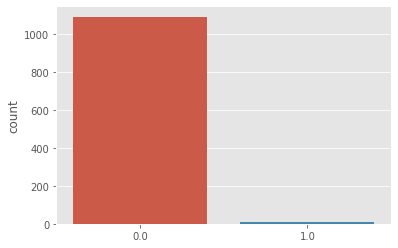

In [ ]:
# Make prediction on the test set
test_df = test_df[main_cols]
predictions = model_lgbm.predict(test_df)

# Create a submission file
sub_file = sample_sub.copy()
sub_file.predictions = predictions

# Check the distribution of your predictions
sns.countplot(sub_file.predictions)

In [ ]:
sub_file.to_csv('Lgbm.csv', index = False)